# Pendahuluan

Dalam tugas kali ini, Anda diminta untuk melakukan EDA pada [dataset "Housing Price"](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) menggunakan teknik visualisasi 1D dan 2D. Dataset "Housing Price" berisi berbagai informasi mengenai properti-properti yang dijual, misalnya zona lokasi, jumlah kamar tidur, ukuran tanah, dll.

# Data Preparation

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Import data -- Silakan di-import berdasarkan direktori masing-masing
house = pd.read_csv(r"C:\Users\purdi\Downloads\train_house.csv")
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [32]:
# Cek kolom Yang NaN
nan_columns = house.isna().sum()[house.isna().sum() > 0]
nan_columns

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [4]:
total=house.isnull().count().sort_values(ascending=False)
total

Id             1460
CentralAir     1460
GarageYrBlt    1460
GarageType     1460
FireplaceQu    1460
               ... 
MasVnrArea     1460
MasVnrType     1460
Exterior2nd    1460
Exterior1st    1460
SalePrice      1460
Length: 81, dtype: int64

In [5]:
# Menghitung persentase NaN per kolom
total_nan=house.isnull().sum().sort_values(ascending=False)
percent= house.isnull().sum()/house.isnull().count().sort_values(ascending=False)
missing_data=pd.concat([total_nan, percent], axis=1, keys=['Total NaN', 'percentage'])
missing_data.head(20)

,Total NaN,percentage
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


-dari 81 kolom, ada 19 kolom yang null jadi lebih baik yang null dibuang karena belum nyampe 50 persen dari data

In [6]:
# Drop variabel NaN
clean_house = house.dropna(axis=1)
clean_house.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [47]:
# Cek kolom Yang NaN
clean_columns = clean_house.isna().sum()[clean_house.isna().sum() > 0]
clean_columns

#ternyata sudah tidak ada nilai NAN

Series([], dtype: int64)

In [8]:
# Memisahkan data menjadi numerikal & kategorikal

numeric_columns= clean_house._get_numeric_data().columns
numerical_data= clean_house[numeric_columns]
numerical_data.head()

#data numeric

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


- tedapat data TimeSeries seperti pada kolom YearBuilt, YearRemodAdd, dan YrSold

In [9]:
# mendapatkan data categorical

categorical_data = clean_house.drop(numeric_columns,axis=1)
categorical_data.head()
    

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1D Visualization 

## Soal 1

1. Buatlah visualisasi barplot dan analisis untuk variabel kategorikal:
    * `Utilities`
    * `HouseStyle`
    * `ExterQual` 

2. Buatlah visualisasi histogram dan analisis untuk variabel numerikal:
    * `SalePrice`
    * `GrLivArea`
    * `PoolArea`

3. Terapkan pemrosesan data yang sesuai untuk masing-masing variabel dan tulis penjelasan serta analisisnya!

## Variabel Kategorikal

### Utilities

* `Utilities` berisi informasi mengenai fasilitas apa saja yang tersedia di properti tersebut
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSeWa	Electricity and Gas Only	

<Axes: xlabel='Utilities', ylabel='proportion'>

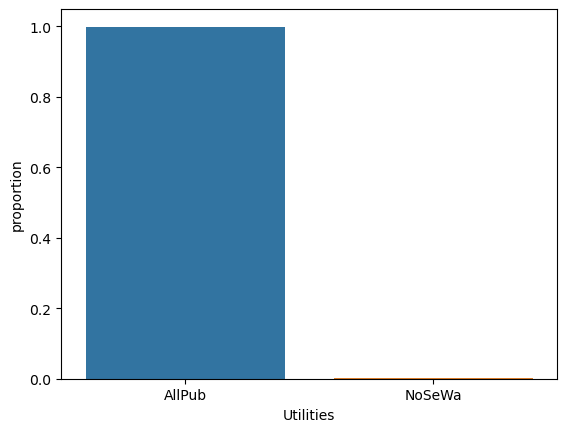

In [11]:
#Utilites

sns.barplot(x= categorical_data['Utilities'].value_counts().index,
           y= categorical_data['Utilities'].value_counts(normalize=True))

In [14]:
categorical_data['Utilities'].value_counts()

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

### HouseStyle

HouseStyle: Style properti (misal: 1 lantai, 2 lantai, dst)
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

<Axes: xlabel='HouseStyle', ylabel='proportion'>

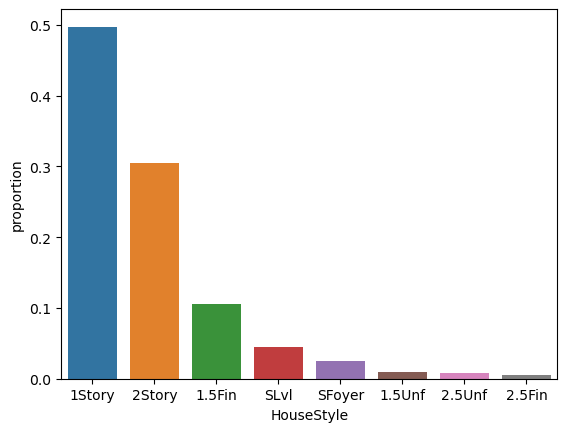

In [12]:
sns.barplot(x= categorical_data['HouseStyle'].value_counts().index,
           y= categorical_data['HouseStyle'].value_counts(normalize=True))

In [18]:
categorical_data['HouseStyle'].value_counts(normalize=True)

HouseStyle
1Story    0.497260
2Story    0.304795
1.5Fin    0.105479
SLvl      0.044521
SFoyer    0.025342
1.5Unf    0.009589
2.5Unf    0.007534
2.5Fin    0.005479
Name: proportion, dtype: float64

### ExterQual

ExterQual: Kualitas material eksterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair

<Axes: xlabel='ExterQual', ylabel='proportion'>

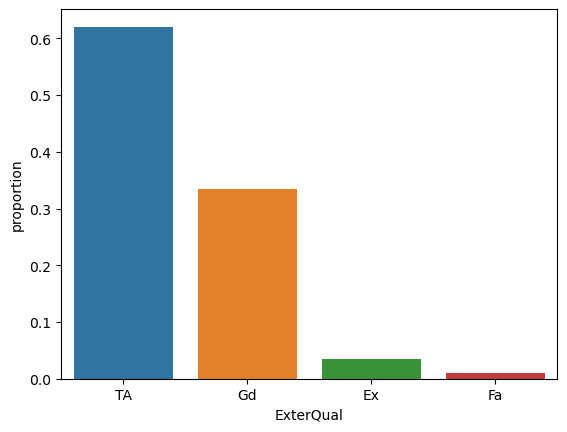

In [13]:
sns.barplot(x= categorical_data['ExterQual'].value_counts().index,
           y= categorical_data['ExterQual'].value_counts(normalize=True))

In [20]:
categorical_data['ExterQual'].value_counts(normalize=True)

ExterQual
TA    0.620548
Gd    0.334247
Ex    0.035616
Fa    0.009589
Name: proportion, dtype: float64

#### **Analisis tentang variabel kategorikal**
#### Utilities
* *- imbalanced data dan 99persen itu ALL pub*
* *- muncul pertanyaan apakah harga ALLPUB itu sangat menarik sehingga semuanya memilih ini*

*-------

* #### Housetyle
* *-Kategori 1Story memiliki proporsi yang cukup besar, yaitu sekitar 49.73%. Ini mendekati 50%, yang menunjukkan bahwa kategori ini mendominasi dataset.*
* *-Kategori-kategori lainnya (1.5Fin, SLvl, SFoyer, 1.5Unf, 2.5Unf, dan 2.5Fin) memiliki proporsi yang sangat kecil,*
* *-data ini imbalacned*
* *- kenapa banyak yang pilih houstyle yang 1 lantai?*
* *-apakah variabel ini mempengaruhi harga properti*

* --------


* #### ExterQual
* *-Kategori TA dan Gd bersama-sama menyumbang lebih dari 95% dari total(2 variabel ini mendominasi), sementara kategori Ex dan Fa hanya menyumbang kurang dari 5%. maka data ini Imbalanced*
* *-kenapa kategori TA sangat dominan apakah karena harganya worth it? dan juga disusul Gd*
* *-sedangkan kenapa yang kualitas excelent dan fair sangat jarang diminati , apak karena faktor harga atau kualitas aktual dilapangannya?*
  

## Variabel Numerikal

### SalePrice

* SalePrice merupakan variabel target yang ingin diprediksi
* Secara fisik, ini berarti harga properti yang dijual

Median: 163000.0
Mean: 180921.19589041095
Std Dev: 79442.50288288663


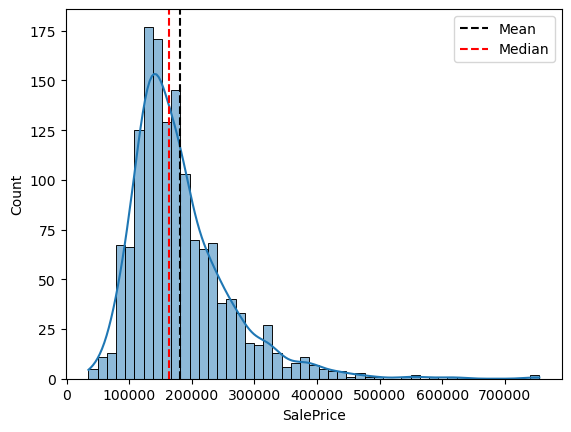

In [33]:
x = numerical_data['SalePrice']
sns.histplot(x, kde=True)
line1= plt.axvline(x.mean(), color='k',linestyle='--', label='Mean')
line2 = plt.axvline(np.median(x), color='r', linestyle='--', label='Median')
first_legend = plt.legend(handles=[line1, line2], loc=1)
print('Median:', x.median())
print('Mean:', x.mean())
print('Std Dev:', x.std())
plt.show()

Median: 163000.0
Mean: 180921.19589041095
Standard Deviation: 79442.50288288663


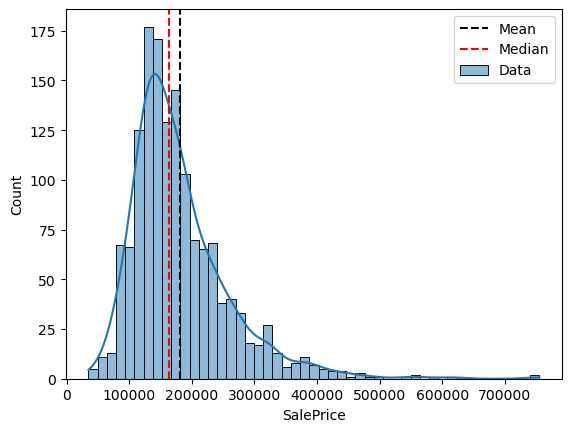

In [35]:
x = numerical_data['SalePrice']

# Membuat distribusi plot
sns.histplot(x, kde=True, label='Data')
plt.xlabel(x.name)  # Menambahkan label sumbu-x

# Menambahkan garis vertikal untuk mean dan median
line1 = plt.axvline(x.mean(), color='k', linestyle='--', label='Mean')
line2 = plt.axvline(x.median(), color='r', linestyle='--', label='Median')

# Menambahkan legenda
plt.legend(loc='upper right')

# Menampilkan statistik
print('Median:', x.median())
print('Mean:', x.mean())
print('Standard Deviation:', x.std())

# Menampilkan plot
plt.show()

#### **Analisis tentang variabel `SalePrice`**

* *-Sebagian besar data terkumpul di sisi kiri (harga rendah), sementara ada ekor panjang ke kanan (harga tinggi). *
* *-hal ini menjelaskan bahwa data kita itu skewed kanan / positive skew*
* *-Kebanyakan properti dijual dengan harga rendah hingga menengah.*
* *-mungkin perlu menyesuaikan atau mentransformasi data (misalnya, dengan log transformasi) untuk mengurangi efek skewness.*


### GrLivArea

* GrLivArea berisi informasi mengenai luas area tinggal di atas permukaan tanah (tidak termasuk basement)
* Satuan yang digunakan adalah *square feet*

median 1464.0
mean 1515.463698630137
std dev 525.4803834232027


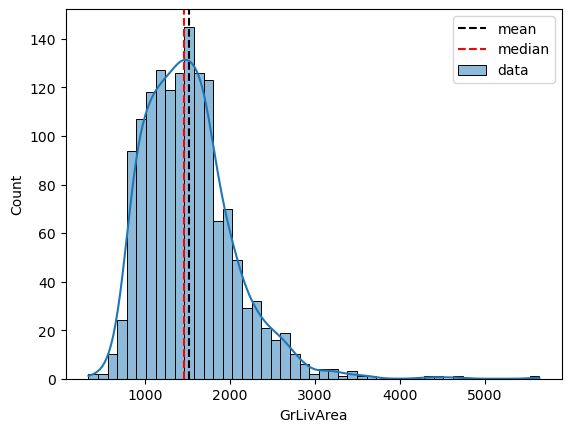

In [43]:
x=numerical_data['GrLivArea']
sns.histplot(x, kde=True, label='data')

plt.xlabel(x.name)

line1= plt.axvline(x.mean(), color='k', linestyle='--', label='mean')
line2= plt.axvline(x.median(), color='r', linestyle='--', label='median')

plt.legend(loc='upper right')

print('median', x.median())
print('mean', x.mean())
print('std dev', x.std())

plt.show()

#### **Analisis tentang variabel `GrlivArea`**

* *-Sebagian besar data terkumpul di sisi kiri (harga rendah), sementara ada ekor panjang ke kanan (harga tinggi). *
* *-hal ini menjelaskan bahwa data kita itu skewed kanan / positive skew*
* *-Kebanyakan properti dijual dengan luas tanah 1000 squarefeet hingga menengah.*
* *-mungkin perlu menyesuaikan atau mentransformasi data (misalnya, dengan log transformasi) untuk mengurangi efek skewness.*
* *-Transformasi logaritma mengompres nilai-nilai besar (di ekor kanan jika right-skewed) lebih signifikan dibandingkan nilai-nilai kecil agar hasilnya lebih simetris.*

### GarageArea

* GarageArea berisi informasi mengenai luas garasi (jika ada)
* Satuan yang digunakan adalah *square feet*

In [68]:
x=numerical_data['GarageArea']
x.value_counts()

GarageArea
0      81
440    49
576    47
240    38
484    34
       ..
320     1
594     1
831     1
878     1
192     1
Name: count, Length: 441, dtype: int64

median 480.0
mean 472.9801369863014
std dev 213.80484145338076


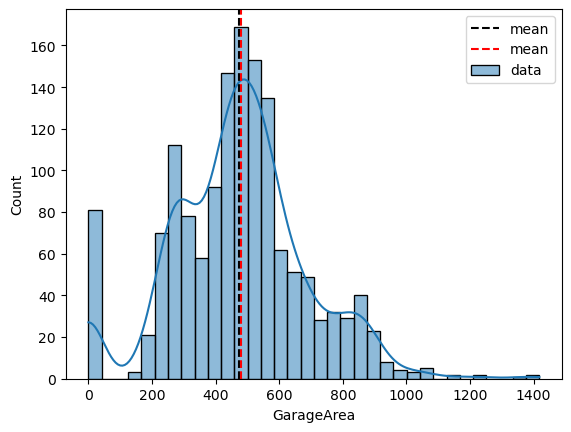

In [45]:
x=numerical_data['GarageArea']
sns.histplot(x, kde=True, label='data')
plt.xlabel(x.name)

line1=plt.axvline(x.mean(), color='k', linestyle='--', label='mean')
line2=plt.axvline(x.median(), color='r', linestyle='--', label='mean')

plt.legend(loc='upper right')

print('median', x.median())
print('mean', x.mean())
print('std dev', x.std())
plt.show()

#### **Analisis tentang variabel `GarageArea`**

* *-Sebagian besar data terkumpul di sisi kiri (harga rendah), sementara ada ekor panjang ke kanan (harga tinggi). *
* *-hal ini menjelaskan bahwa data kita itu skewed kanan / positive skew*
* *-ANGKA 0 CUKUP BANYAK.*
* *-perlu dicek itu tuh beneran angka 0 atau hanya mendekati angka 0*

In [73]:
print('jumlah_bukan_nol:',np.sum(numerical_data['GarageArea'] !=0))
print('jumlah_nilai_nol:',np.sum(numerical_data['GarageArea']==0))

jumlah_bukan_nol: 1379
jumlah_nilai_nol: 81


* *ternayata angka 0 ini menjelaskan bahwa tidak semua rumah ada garasi nya*

## Pemrosesan Data Variabel Numerikal

Median: 5.212187604403958
Mean: 5.221978956475628
Standard Deviation: 0.17347974217176843


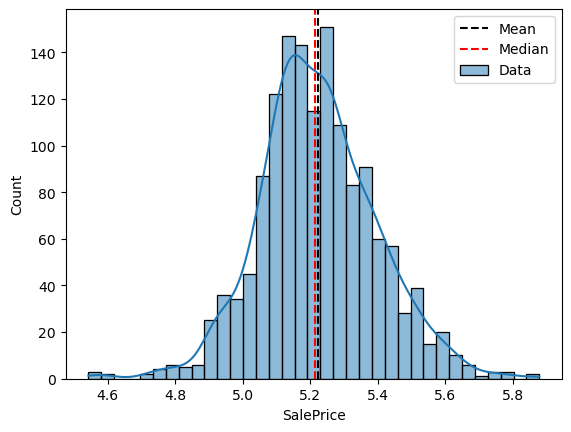

In [67]:
#LOG-10 SalePrice

x = np.log10(numerical_data['SalePrice'])
sns.histplot(x, kde=True, label='Data')
plt.xlabel(x.name)  # Menambahkan label sumbu-x

line1 = plt.axvline(x.mean(), color='k', linestyle='--', label='Mean')
line2 = plt.axvline(x.median(), color='r', linestyle='--', label='Median')

plt.legend(loc='upper right')

# Menampilkan statistik
print('Median:', x.median())
print('Mean:', x.mean())
print('Standard Deviation:', x.std())

# Menampilkan plot
plt.show()

median 7.288927694521257
mean 7.267774383311004
std dev 0.3335504242692843


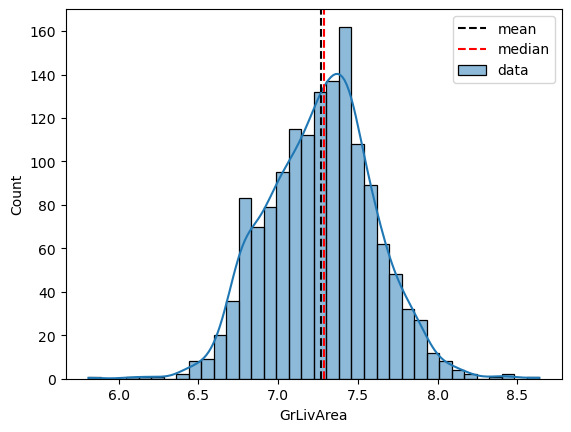

In [66]:
#LOG-10 GrLivArea

x=np.log(numerical_data['GrLivArea'])
sns.histplot(x, kde=True, label='data')

plt.xlabel(x.name)

line1= plt.axvline(x.mean(), color='k', linestyle='--', label='mean')
line2= plt.axvline(x.median(), color='r', linestyle='--', label='median')

plt.legend(loc='upper right')

print('median', x.median())
print('mean', x.mean())
print('std dev', x.std())

plt.show()

median: 484.0
mean: 500.76214648295866
std dev: 185.68051979433156


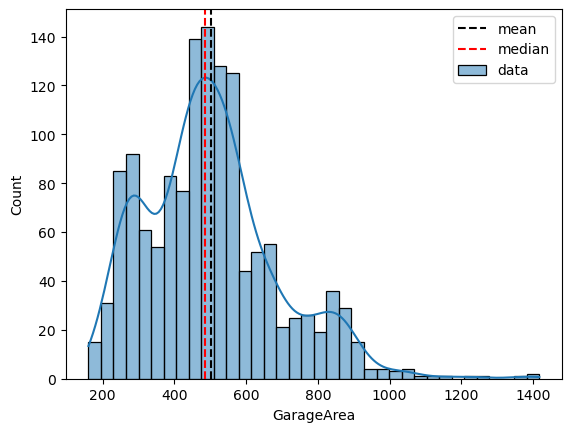

In [78]:
# Menghilangkan nilai nol pada GarageArea

x=numerical_data['GarageArea'][numerical_data['GarageArea'] !=0]
sns.histplot(x, kde=True, label='data')
plt.xlabel(x.name)

line1=plt.axvline(x.mean(), color='k', linestyle='--', label='mean')
line2=plt.axvline(x.median(), color='r', linestyle='--', label='median')

plt.legend(loc='upper right')

print('median:', x.median())
print('mean:', x.mean())
print('std dev:', x.std())

plt.show()

#### **Penjelasan dan analisis tentang pemrosesan data**

* *-Transformasi logaritma mengompres nilai-nilai besar (di ekor kanan jika right-skewed) lebih signifikan dibandingkan nilai-nilai kecil agar hasilnya lebih simetris.*
* *-Contohnya:

Jika angka awalnya 10.000, setelah log10 menjadi 4.
Tapi kalau angka awalnya 10, setelah log10 hanya menjadi 1.*

* *ternayata angka 0 pada kolom 'GarageArea' ini menjelaskan bahwa tidak semua rumah ada garasi nya*

# 2D Visualization
* *- untuk melihat korelasi antar variabel*

## Soal 2

1. Buat visualisasi tentang hubungan antara:
    * `GrLivArea` dengan `SalePrice`
    * `GarageArea` dengan `SalePrice`

2. Buat hipotesis Anda tentang hubungan antar-variabel

# `GrLivArea` dengan `SalePrice`

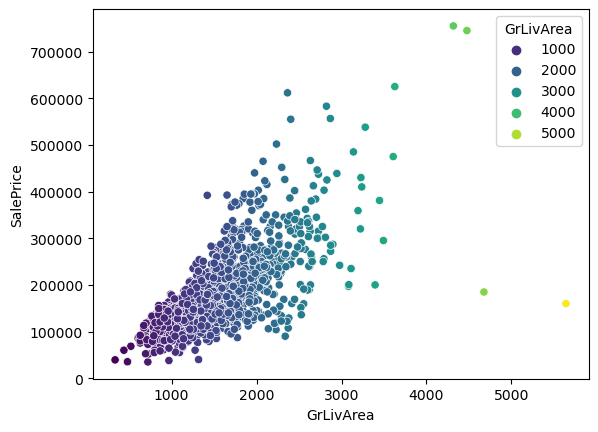

In [102]:
ax = sns.scatterplot(y='SalePrice' ,x='GrLivArea',hue='GrLivArea',palette='viridis' ,data= numerical_data)
plt.show()

# `GarageArea` dengan `SalePrice`

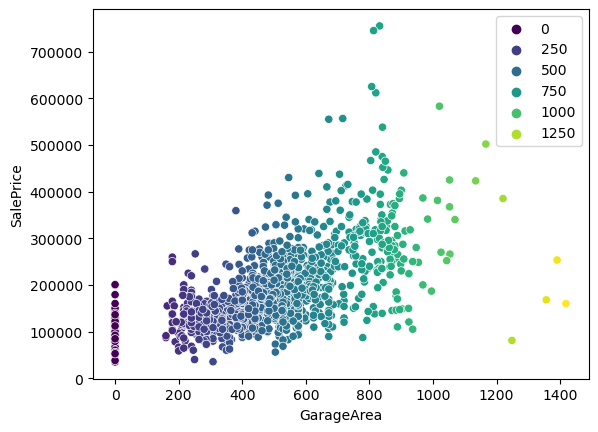

In [105]:
ax = sns.scatterplot(y='SalePrice' ,x='GarageArea',hue='GarageArea',palette='viridis' ,data= numerical_data)
plt.legend(loc='upper right')
plt.show()

#### **Hipotesis tentang hubungan antar-variabel**

* *- pada hubungan GrLivArea dan SalePrice terlihat korelasi positif yaitu = semakin besar luas area (GrLivArea), semakin besar juga harganya (SalePrice)*
* *- akan tetapi terdapat nilai anomali (titik yang bewarna kuning)*
* *- dari scatterplot ini kita juga bisa melihat trendline dari data yang dianalisis*

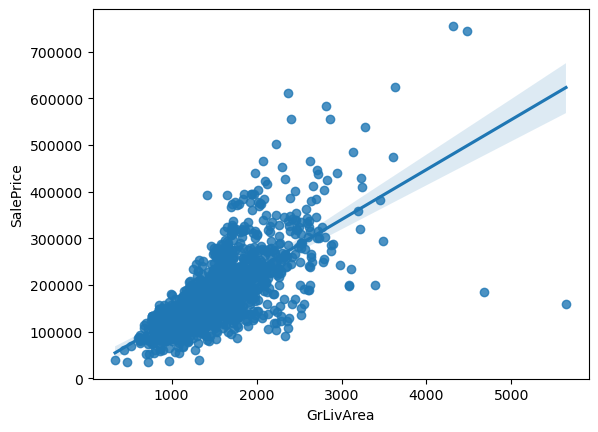

In [108]:
trendline= sns.regplot(x='GrLivArea', y='SalePrice', data= numerical_data )
plt.show()

#### **Hipotesis tentang hubungan antar-variabel**

* *- pada hubungan GarageArea dan SalePrice terlihat korelasi positif yaitu = semakin besar luas area (Garage Area), semakin besar juga harganya (SalePrice)*
* *- akan tetapi terdapat nilai anomali (titik yang bewarna kuning)*
* *- dari scatterplot ini kita juga bisa melihat trendline dari data yang dianalisis*

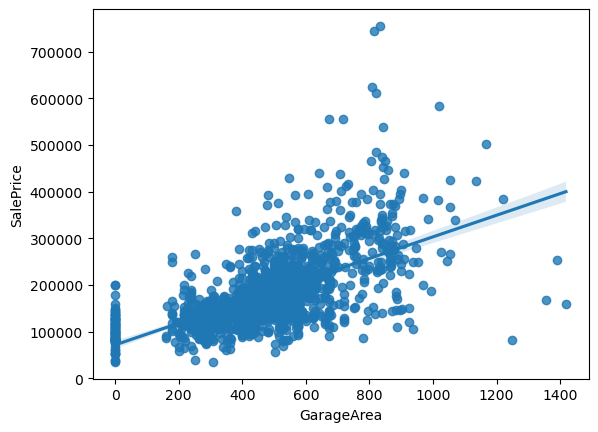

In [111]:
trendline= sns.regplot(x='GarageArea', y='SalePrice', data= numerical_data )
plt.show()